In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
%matplotlib inline

In [3]:
%pwd

'C:\\Users\\ru89110\\Documents\\PWG EW'

In [4]:
os.chdir("10.1")

In [5]:
df=pd.read_excel("Combined File 2018.10.xlsx") 

In [11]:
os.chdir("SUBSETS")

In [16]:
SAMPLEspImpliedBTMU=pd.read_excel("SAMPLEspImpliedBTMU.xlsx")
SAMPLEMoodysImpliedBTMU=pd.read_excel("SAMPLEMoodysImpliedBTMU.xlsx")
SAMPLEEDFImpliedBTMU=pd.read_excel("SAMPLEEDFImpliedBTMU.xlsx")
SAMPLECDSImpliedBTMU=pd.read_excel("SAMPLECDSImpliedBTMU.xlsx")

### Combination C51

In [24]:
sp=list(SAMPLEspImpliedBTMU.index)
Moodys=list(SAMPLEMoodysImpliedBTMU.index)
EDF=list(SAMPLEEDFImpliedBTMU.index)
CDS=list(SAMPLECDSImpliedBTMU.index)

In [28]:
len(sp)

2988

In [29]:
len(Moodys)

1533

### Combination C55

In [31]:
len(sp+Moodys+EDF+CDS)  

25646

In [33]:
len(set(sp+Moodys+EDF+CDS))

21249

In [36]:
C55Index=list(set(sp+Moodys+EDF+CDS))

In [39]:
C55Df=df.iloc[C55Index,:]

In [40]:
C55Df.to_excel('C55Df.xlsx', index  = True)

In [42]:
C55Df.columns

Index(['As of Date', 'BTM Borrower Rtg', 'BTM Rating', 'Dowgrade ',
       'Downgrade Notch', 'CDL Customer ID', 'Cust Regist Nm', 'Division',
       'Exposure', 'EDF Implied BTMU Rating', 'EDF Notch', 'EDF Value',
       'Notch Diff EDF Implied vs BTMU', 'Secondary Loan Avg Price',
       'CDS Implied BTMU Rating', 'CDS Spread (5yr)',
       'Notch Diff CDS Implied vs BTMU', 'Moodys Implied BTMU Rating',
       'Moodys LT Rating', 'Notch Diff Moodys Implied vs BTMU',
       'S&P Implied BTMU Rating', 'S&P LT Rating', 'Moody's Id', 'BIR',
       'Index', 'index'],
      dtype='object')

### Modeling on C55 Dataset

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [51]:
Y=C55Df['Dowgrade ']

In [45]:
C55Df['Dowgrade '].value_counts()

0    20748
1      501
Name: Dowgrade , dtype: int64

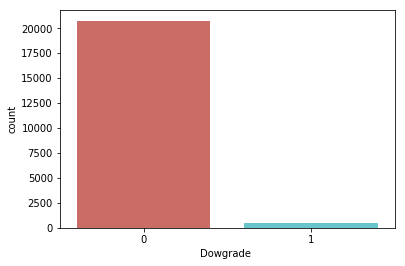

In [53]:
sns.countplot(x='Dowgrade ',data=C55Df, palette='hls') 

imbalanced class, needs to further balance the classes
up-sample the no-subscription using the SMOTE algorithm  (only over sampling on the training data)

In [54]:
count_0 = len(C55Df[C55Df['Dowgrade ']==0])
count_1 = len(C55Df[C55Df['Dowgrade ']==1])
pct_of_0 = count_0/(count_0+count_1)
print("percentage of no downgrade is", pct_of_0*100)
pct_of_1 = count_1/(count_0+count_1)
print("percentage of subscription", pct_of_1*100)

percentage of no downgrade is 97.64224198785824
percentage of subscription 2.3577580121417476


In [ ]:
C55Df.groupby('')